# An in-depth analysis into the history of Ballon d'or

## ETL

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='ballon-d-or.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Unnamed: 0,year,rank,player,team,points,percentages
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45


In [2]:
df_ball = df_data_1

In [3]:
df_ball.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
df_ball.head()

,year,rank,player,team,points,percentages
0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90
1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48
2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61
3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54
4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45


## DATA ANALYSIS

In [5]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [6]:
df_ball1 = df_ball[df_ball['rank'] == "1st"]
df_ball2 = df_ball[df_ball['rank'] == "2nd"]
df_ball3 = df_ball[df_ball['rank'] == "3rd"]

In [7]:
df_ball_1 = df_ball['player'].value_counts().to_frame()
df_ball_1.rename(columns={'player': 'Frequency'}, inplace=True)
df_ball_1.index.name = "Player"

In [8]:
df_ball_11 = df_ball_1.head(10)
df_ball_11 = df_ball_11.sort_values("Frequency", ascending = True)

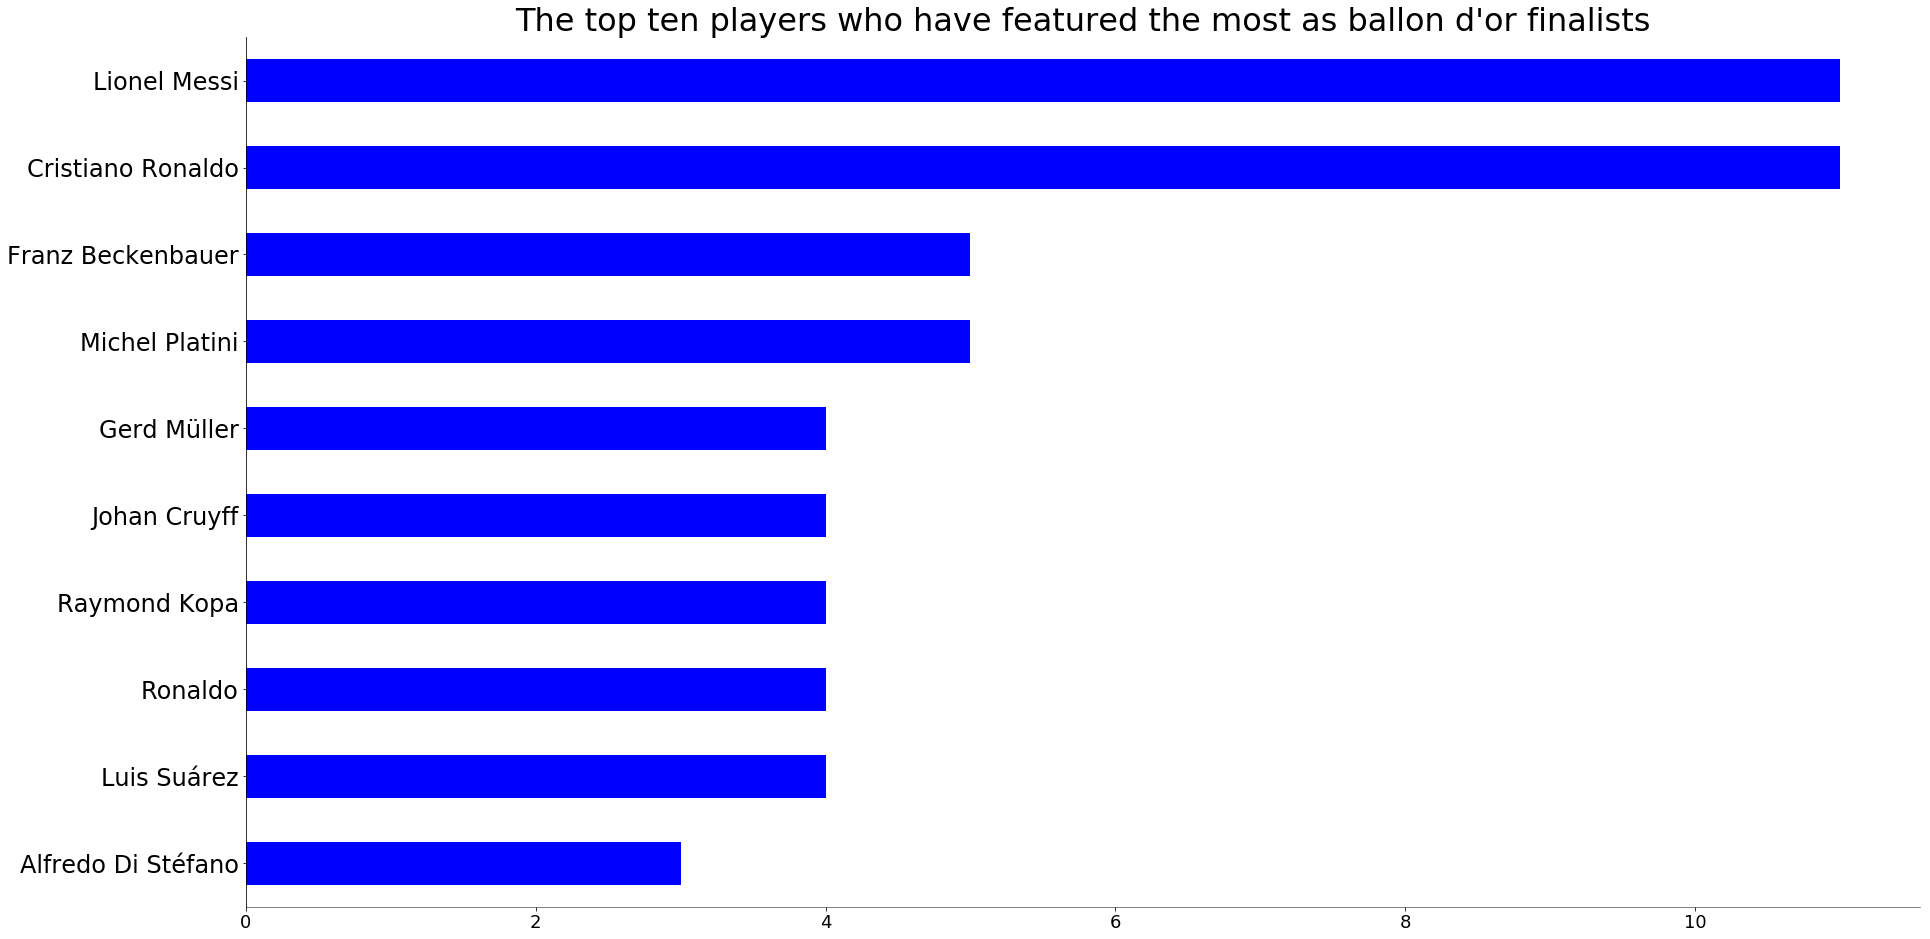

In [9]:
## A horizontal bar graph showing us which player won the most ballon d'ors
bar = df_ball_11.plot(kind='barh',figsize=(30, 16), color = "blue", legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.ylabel("")
plt.title("The top ten players who have featured the most as ballon d'or finalists", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [10]:
df_ball_2 = df_ball['team'].value_counts().to_frame()
df_ball_2.rename(columns={'team': 'Frequency'}, inplace=True)
df_ball_2.index.name = "team"
df_ball_21 = df_ball_2.head(20)
df_ball_21 = df_ball_21.sort_values("Frequency", ascending = True)

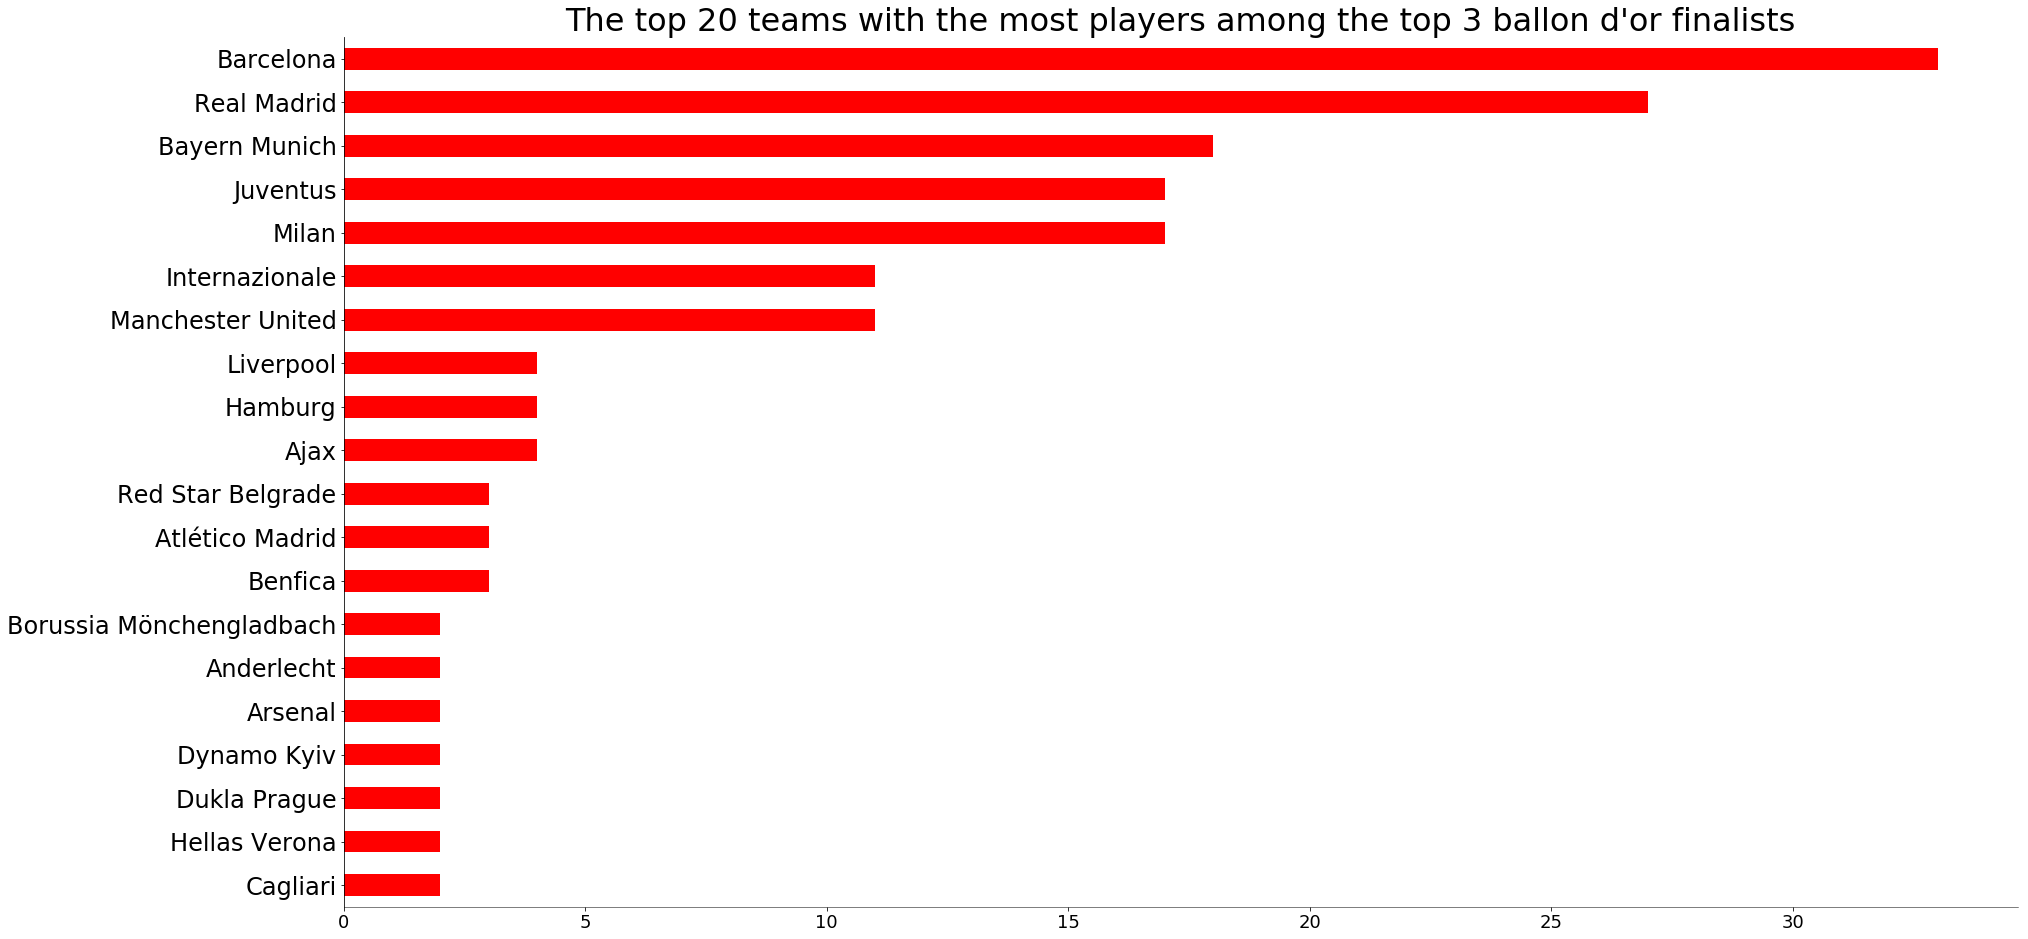

In [11]:
## A horizontal bar graph showing us which team produced the most to the top 3 spots for ballon d'or
bar2 = df_ball_21.plot(kind='barh',figsize=(30, 16), color = "red", legend = None)
bar2
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.ylabel("")
plt.title("The top 20 teams with the most players among the top 3 ballon d'or finalists", fontsize=32)
bar2.spines['top'].set_visible(False)
bar2.spines['right'].set_visible(False)
bar2.spines['bottom'].set_linewidth(0.5)
bar2.spines['left'].set_visible(True)
plt.show()

In [12]:
df_ball_22 = df_ball1['team'].value_counts().to_frame()
df_ball_22.rename(columns={'team': 'Frequency'}, inplace=True)
df_ball_22.index.name = "team"
df_ball_221 = df_ball_22.head(20)
df_ball_221 = df_ball_221.sort_values("Frequency", ascending = True)

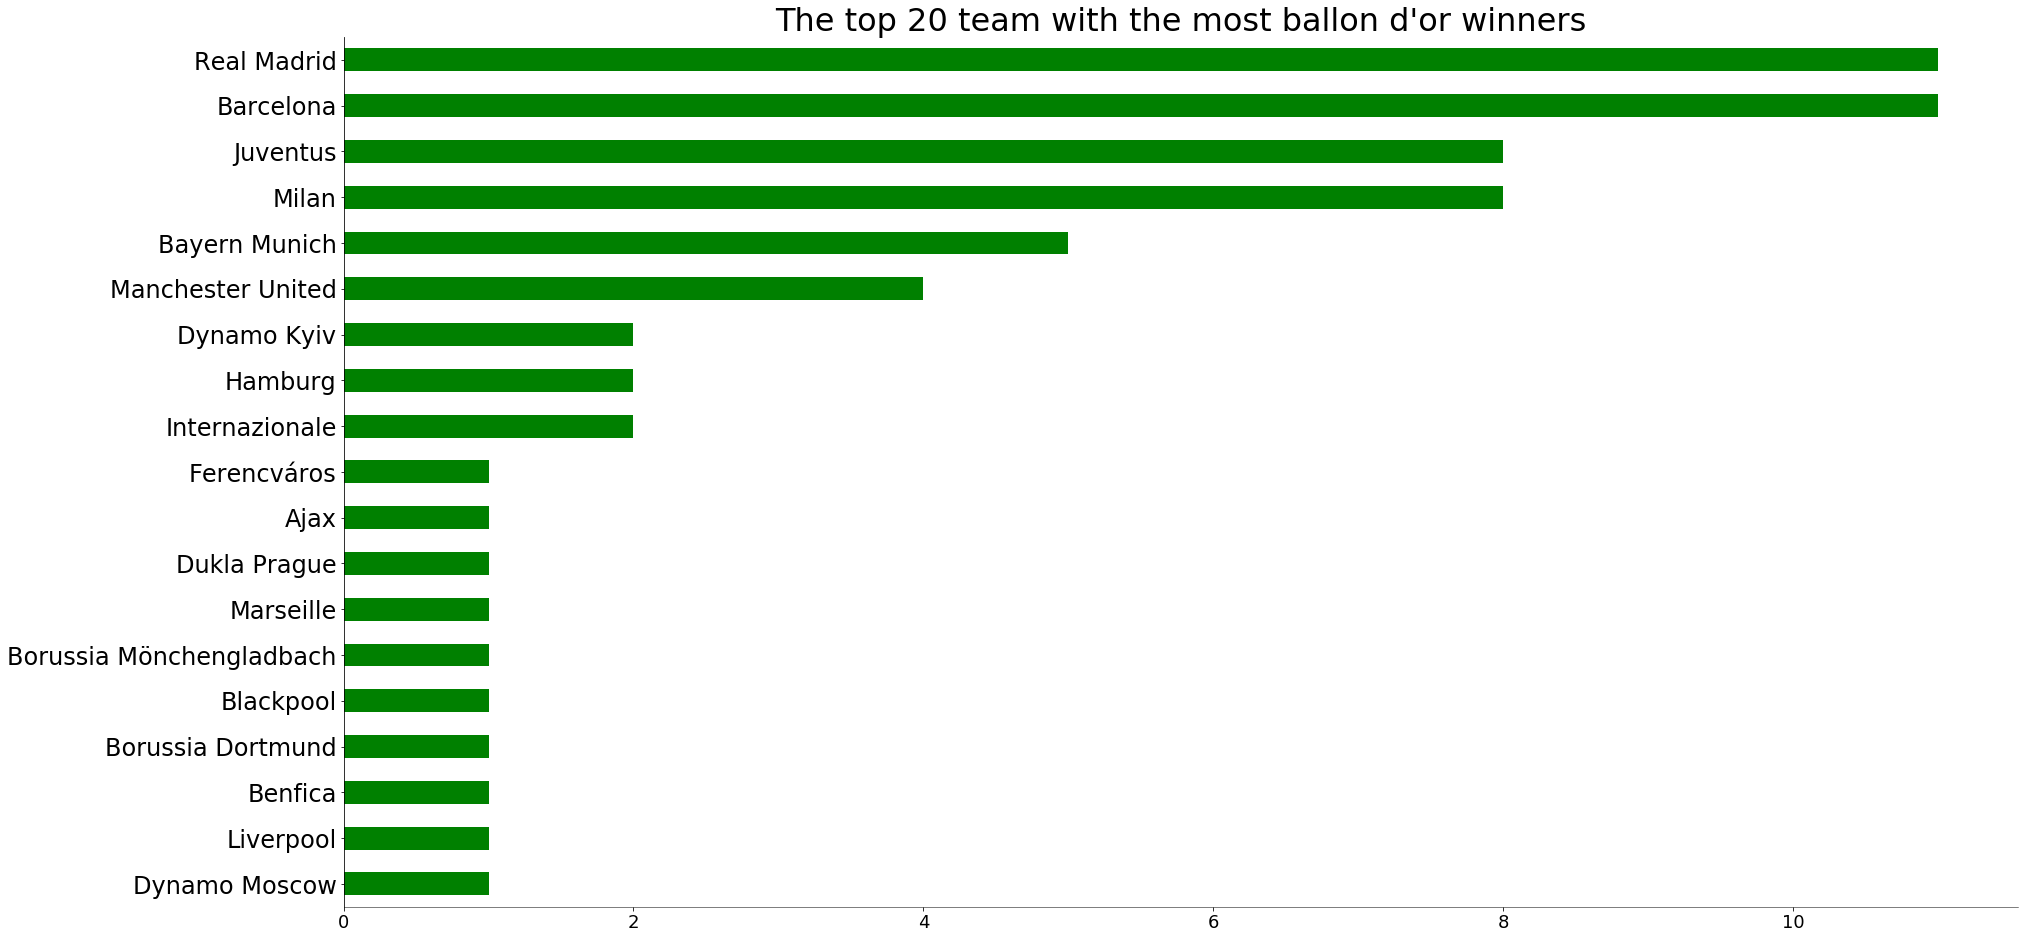

In [13]:
## A horizontal bar graph showing us which team produced the most ballon d'or winners
bar3 = df_ball_221.plot(kind='barh',figsize=(30, 16), color = "green", legend = None)
bar3
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.ylabel("")
plt.title("The top 20 team with the most ballon d'or winners", fontsize=32)
bar3.spines['top'].set_visible(False)
bar3.spines['right'].set_visible(False)
bar3.spines['bottom'].set_linewidth(0.5)
bar3.spines['left'].set_visible(True)
plt.show()

In [14]:
df_ball1_1 = df_ball1['player'].value_counts().to_frame()
df_ball1_1.rename(columns={'player': 'Frequency'}, inplace=True)
df_ball1_1.index.name = "Player"

In [15]:
df_ball1_1 = df_ball1_1.head(10)
df_ball1_1 = df_ball1_1.sort_values("Frequency", ascending = True)

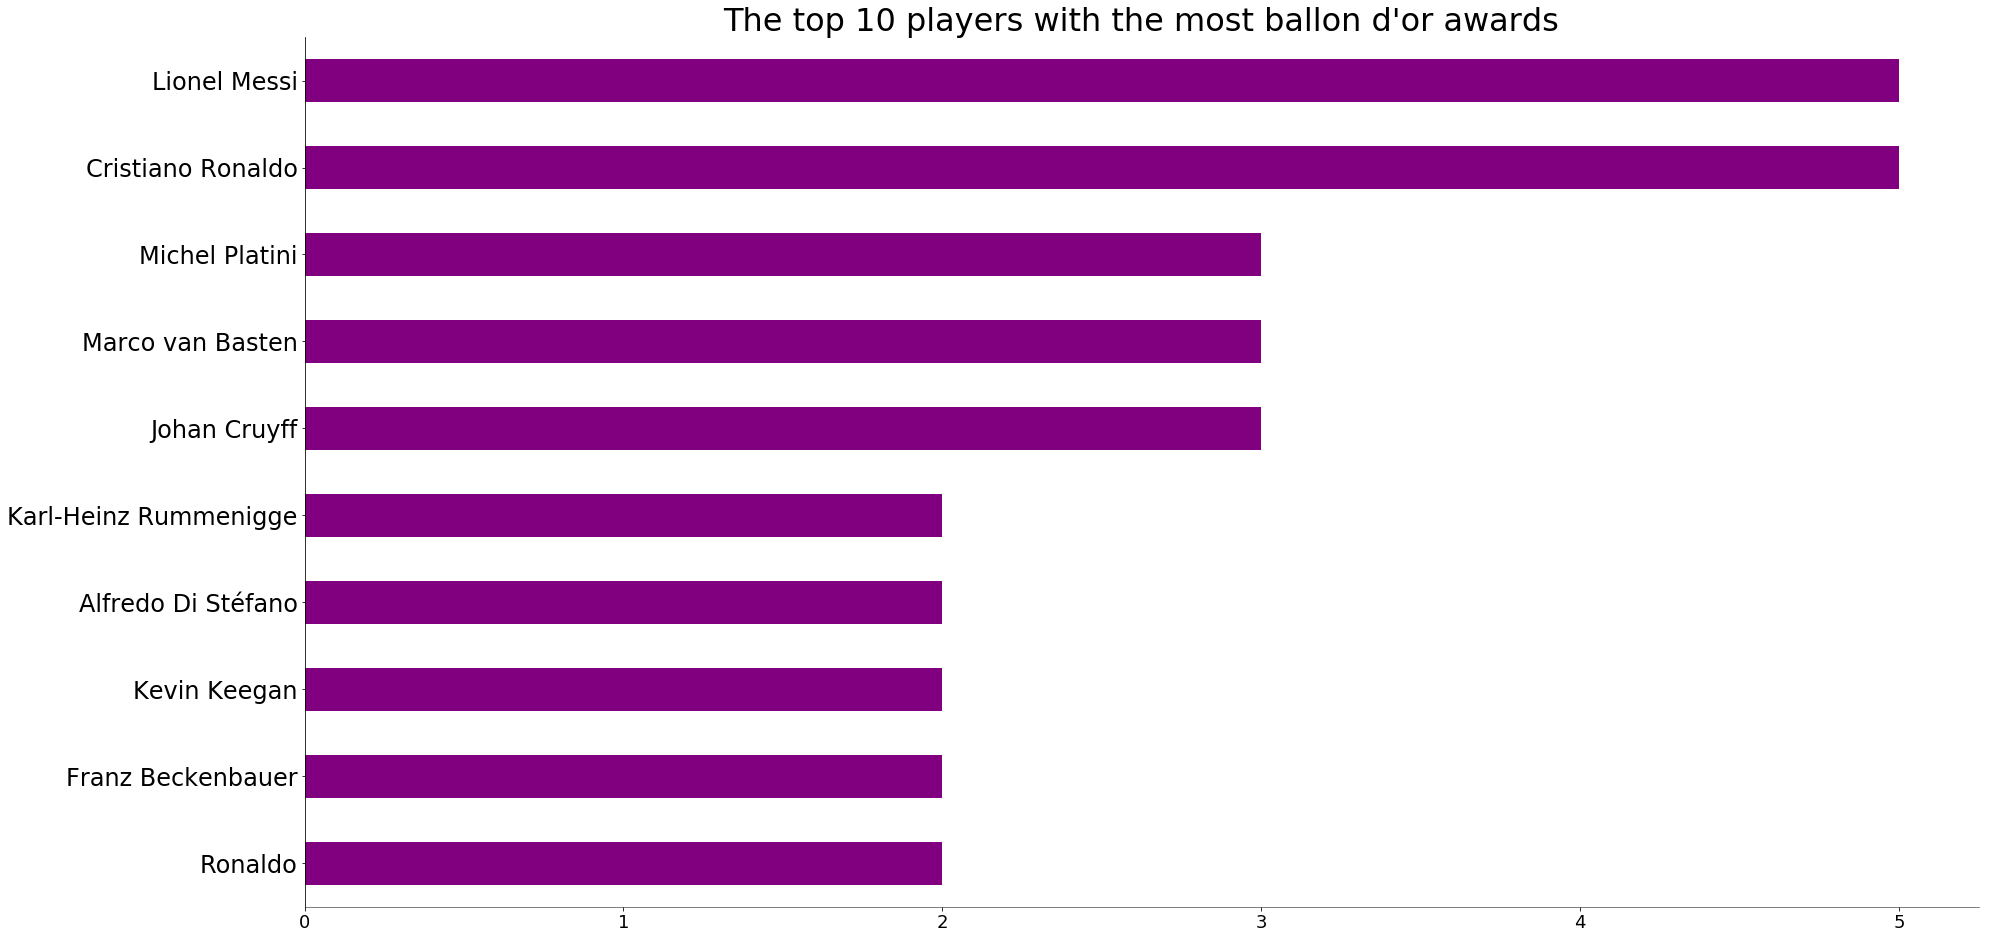

In [16]:
## A horizontal bar graph showing us which players have won the most ballon d'or
bar4 = df_ball1_1.plot(kind='barh',figsize=(30, 16), color = "purple", legend = None)
bar4
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.ylabel("")
plt.title("The top 10 players with the most ballon d'or awards", fontsize=32)
bar4.spines['top'].set_visible(False)
bar4.spines['right'].set_visible(False)
bar4.spines['bottom'].set_linewidth(0.5)
bar4.spines['left'].set_visible(True)
plt.show()

In [17]:
df_ball1_2 = df_ball1.sort_values("percentages", ascending = False)

In [18]:
df_ball1_3 = df_ball1_2.reset_index()
df_ball1_3.drop("index", axis = 1, inplace = True)

In [19]:
df_ball1_3.head()

,year,rank,player,team,points,percentages
0,1983,1st,Michel Platini,Juventus,110.0,68.32
1,1980,1st,Karl-Heinz Rummenigge,Bayern Munich,122.0,64.55
2,1998,1st,Zinedine Zidane,Juventus,244.0,64.55
3,1975,1st,Oleg Blokhin,Dynamo Kyiv,122.0,63.87
4,1997,1st,Ronaldo,Internazionale,222.0,62.89


In [20]:
df_ball1_3.tail()

,year,rank,player,team,points,percentages
58,1970,1st,Gerd Müller,Bayern Munich,77.0,36.32
59,1977,1st,Allan Simonsen,Borussia Mönchengladbach,74.0,34.42
60,1972,1st,Franz Beckenbauer,Bayern Munich,81.0,33.89
61,2013,1st,Cristiano Ronaldo,Real Madrid,NaN,27.99
62,2010,1st,Lionel Messi,Barcelona,NaN,22.65


In [21]:
df_ball4 = df_ball[['team','points']]

In [22]:
df_ball_4_1 = df_ball4.groupby("team").sum()

In [23]:
df_ball5 = pd.merge(df_ball_4_1, df_ball_2, on = "team")
df_ball5.head()

,points,Frequency
team,,
Ajax,277.0,4
Anderlecht,125.0,2
Arsenal,249.0,2
Atlético Madrid,703.0,3
Barcelona,3869.0,33


In [24]:
df_ball6 = df_ball5.sort_values("points", ascending = False)
df_ball6.head()

,points,Frequency
team,,
Real Madrid,4190.0,27
Barcelona,3869.0,33
Juventus,2258.0,17
Milan,1998.0,17
Bayern Munich,1292.0,18


In [25]:
df_ball6 = df_ball6[['points']].head(10)
df_ball6 = df_ball6.sort_values("points", ascending = True)

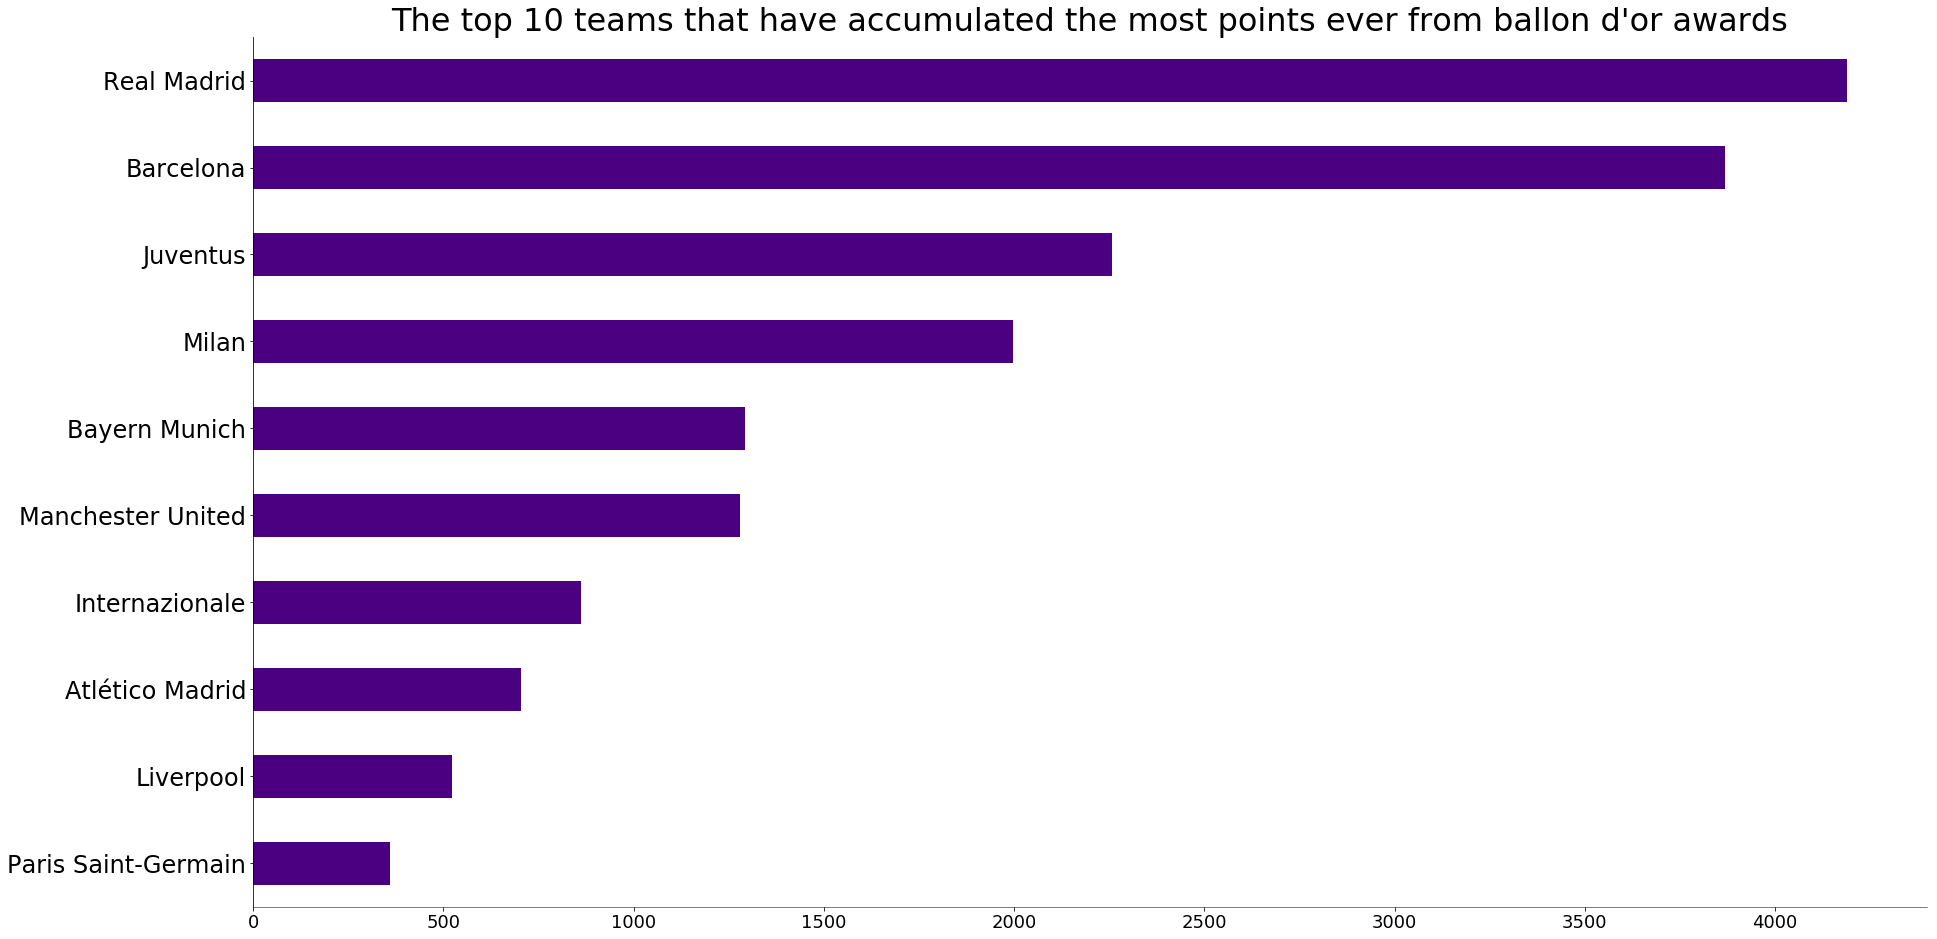

In [26]:
## A horizontal bar graph showing us which teams have accumulated the most points ever in ballon d'or
bar5 = df_ball6.plot(kind='barh',figsize=(30, 16), color = "indigo", legend = None)
bar5
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.ylabel("")
plt.title("The top 10 teams that have accumulated the most points ever from ballon d'or awards", fontsize=32)
bar5.spines['top'].set_visible(False)
bar5.spines['right'].set_visible(False)
bar5.spines['bottom'].set_linewidth(0.5)
bar5.spines['left'].set_visible(True)
plt.show()